# 합성곱 신경망(Convolution Neural Network)

- 이미지 인식, 음성 인식 등에 자주 사용되는데,  
  특히, 이미지 인식 분야에서 거의 모든 딥러닝 기술에 사용

<br>

## 컨볼루션 신경망의 등장
- 1989년 얀 르쿤(Yann LeCun) 교수의 논문에서 발표

  - 필기체 인식에서 의미가 있었지만 범용화하는데에는 무리

- 1998년, "Gradient-Based Learning Applied to Document Recognition"이라는 논문에서 LeNet-5 제시

- 합성곱 층(convolution layer), 풀링 층(pooling layer) 소개
  <br>

  <img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png">
  
  <center>[LeNet-5 구조]</center>

  <sub>출처: https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4</sub>

## 컨볼루션 신경망 구조 예시

<img src="https://www.oreilly.com/library/view/neural-network-projects/9781789138900/assets/c38754ca-f2ea-425a-b7a6-1fe0f2f5074e.png" width="600">

<sub>출처: https://www.oreilly.com/library/view/neural-network-projects/9781789138900/8e87ad66-6de3-4275-81a4-62b54436bf16.xhtml</sub>



## 합성곱 연산
- 필터(filter) 연산
  - 입력 데이터에 필터를 통한 어떠한 연산을 진행
  
  - **필터에 대응하는 원소끼리 곱하고, 그 합을 구함**

  - 연산이 완료된 결과 데이터를 **특징 맵(feature map)**이라 부름

- 필터(filter)
  - 커널(kernel)이라고도 칭함
  
  - 흔히 사진 어플에서 사용하는 '이미지 필터'와 비슷한 개념

  - 필터의 사이즈는 "거의 항상 홀수"
    - 짝수이면 패딩이 비대칭이 되어버림
  
    - 왼쪽, 오른쪽을 다르게 주어야함
  
    - 중심위치가 존재, 즉 구별된 하나의 픽셀(중심 픽셀)이 존재

  - 필터의 학습 파라미터 개수는 입력 데이터의 크기와 상관없이 일정  
    따라서, 과적합을 방지할 수 있음

  <br>
  <img src="http://deeplearning.net/software/theano_versions/dev/_images/numerical_no_padding_no_strides.gif">

  <sub>출처: http://deeplearning.net/software/theano_versions/dev/tutorial/conv_arithmetic.html</sub>


- 연산 시각화
  <img src="https://www.researchgate.net/profile/Ihab_S_Mohamed/publication/324165524/figure/fig3/AS:611103423860736@1522709818959/An-example-of-convolution-operation-in-2D-2.png" width="500">

  <sub>출처: https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524</sub>


- 일반적으로, 합성곱 연산을 한 후의 데이터 사이즈는  
  ### $\quad (n-f+1) \times (n-f+1)$
    $n$: 입력 데이터의 크기  
    $f$: 필터(커널)의 크기


  <img src="https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width="400">

  <sub>출처: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1</sub>
  
  위 예에서 입력 데이터 크기($n$)는 5, 필터의 크기($k$)는 3이므로  
  출력 데이터의 크기는 $(5 - 3 + 1) = 3$


## 패딩(padding)과 스트라이드(stride)
- 필터(커널) 사이즈과 함께 **입력 이미지와 출력 이미지의 사이즈를 결정**하기 위해 사용

- 사용자가 결정할 수 있음



### 패딩
- 입력 데이터의 주변을 특정 값으로 채우는 기법
  - 주로 0으로 많이 채움

  <img src="http://deeplearning.net/software/theano_versions/dev/_images/arbitrary_padding_no_strides.gif" width="300">

- 출력 데이터의 크기
  ### $\quad (n+2p-f+1) \times (n+2p-f+1)$

  위 그림에서, 입력 데이터의 크기($n$)는 5, 필터의 크기($f$)는 4, 패딩값($p$)은 2이므로    
  출력 데이터의 크기는 ($5 + 2\times 2 - 4 + 1) = 6$

### 'valid' 와 'same'
- 'valid'
  - 패딩을 주지 않음
  - padding=0 (0으로 채워진 테두리가 아니라 패딩을 주지 않는다는 의미)

- 'same'
  - 패딩을 주어 입력 이미지의 크기와 연산 후의 이미지 크기를 같게함

  - 만약, 필터(커널)의 크기가 $k$ 이면,  
    패딩의 크기는 $p = \frac{k-1}{2}$ (단, <u>stride=1)</u>



### 스트라이드
- 필터를 적용하는 간격을 의미

- 아래는 그림의 간격 2

  <img src="http://deeplearning.net/software/theano_versions/dev/_images/no_padding_strides.gif">


## 출력 데이터의 크기

## $\qquad OH = \frac{H + 2P - FH}{S} + 1 $
## $\qquad OW = \frac{W + 2P - FW}{S} + 1 $

- 입력 크기 : $(H, W)$

- 필터 크기 : $(FH, FW)$

- 출력 크기 : $(OH, OW)$

- 패딩, 스트라이드 : $P, S$

- (주의)
  - 위 식의 값에서 $\frac{H + 2P - FH}{S}$ 또는 $\frac{W + 2P - FW}{S}$가 정수로 나누어 떨어지는 값이어야 함
  - 만약, 정수로 나누어 떨어지지 않으면  
    패딩, 스트라이드값을 조정하여 정수로 나누어 떨어지게 해야함


## 풀링(Pooling)

- 필터(커널) 사이즈 내에서 특정 값을 추출하는 과정

### 맥스 풀링(Max Pooling)
- 가장 많이 사용되는 방법

- 출력 데이터의 사이즈 계산은 컨볼루션 연산과 동일
## $\quad OH = \frac{H + 2P - FH}{S} + 1 $
## $\quad OW = \frac{W + 2P - FW}{S} + 1 $

- 일반적으로 stride=2, kernel_size=2 를 통해  
  **특징맵의 크기를 <u>절반으로 줄이는 역할</u>**

- 모델이 물체의 주요한 특징을 학습할 수 있도록 해주며,  
  컨볼루션 신경망이 이동 불변성 특성을 가지게 해줌
  - 예를 들어, 아래의 그림에서 초록색 사각형 안에 있는  
    2와 8의 위치를 바꾼다해도 맥스 풀링 연산은 8을 추출

- 모델의 파라미터 개수를 줄여주고, 연산 속도를 빠르게 해줌

  <br>

  <img src="https://cs231n.github.io/assets/cnn/maxpool.jpeg" width="600">

  <sub>출처: https://cs231n.github.io/convolutional-networks/</sub>

## Conv1D

- 텍스트 분류나 시계열 예측 같은 간단한 문제, 오디오 생성, 기계 번역 등의 문제에서 좋은 성능

- 타임스텝의 순서에 민감하지 X


- 2D Convolution
  - 지역적 특징을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/2D-convolutional-example_2x-700x584.png" width="500">

- 1D Convolution
  - 문맥을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/1D-convolutional-example_2x.png" width="500">

  <sub>출처: https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</sub>

### Conv1D Layer
- 입력: `(batch_size, timesteps, channels)`

- 출력: `(batch_size, timesteps, filters)`

- 필터의 사이즈가 커져도 모델이 급격히 증가하지 않기 때문에 다양한 크기를 사용할 수 있음
- 데이터의 품질이 좋으면 굳이 크기를 달리하여 여러 개를 사용하지 않아도 될 수도 있음

### MaxPooling1D Layer
- 다운 샘플링 효과

- 단지 1차원형태로 바뀐 것 뿐

### GlovalMaxPooling Layer
- 배치차원을 제외하고 2차원 형태를 1차원 형태로 바꾸어주는 레이어

- Flatten layer로 대신 사용가능

## IMDB 데이터

### 데이터 로드 및 전처리

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [3]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = num_words)

print(len(input_train))
print(len(input_test))

25000
25000


In [4]:
pad_x_train = pad_sequences(input_train, maxlen = max_len)
pad_x_test = pad_sequences(input_test, maxlen = max_len)

print(pad_x_train)
print(pad_x_test)

[[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]
[[   0    0    0 ...   14    6  717]
 [   0    0    0 ...  125    4 3077]
 [  33    6   58 ...    9   57  975]
 ...
 [   0    0    0 ...   21  846 5518]
 [   0    0    0 ... 2302    7  470]
 [   0    0    0 ...   34 2005 2643]]


### 모델 구성

In [5]:
model = Sequential([Embedding(input_dim=num_words, output_dim=32, input_length=max_len),
                    Conv1D(filters=32, kernel_size=7, activation='relu'),
                    MaxPooling1D(7),
                    Conv1D(filters=32, kernel_size=5, activation='relu'),
                    MaxPooling1D(5),
                    GlobalMaxPooling1D(),             #Flatten 효과
                    Dense(1, activation='sigmoid')])  #긍정/부정 이진분류

model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           7200      
                                                                 
 max_pooling1d (MaxPooling1  (None, 70, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 66, 32)            5152      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 13, 32)            0         
 g1D)                                                            
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0

### 모델 학습

In [6]:
history = model.fit(pad_x_train, y_train,
                    epochs=30, verbose=2,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/30
313/313 - 38s - loss: 0.6930 - acc: 0.5120 - val_loss: 0.6926 - val_acc: 0.5248 - 38s/epoch - 122ms/step
Epoch 2/30
313/313 - 16s - loss: 0.6915 - acc: 0.5616 - val_loss: 0.6919 - val_acc: 0.5238 - 16s/epoch - 51ms/step
Epoch 3/30
313/313 - 14s - loss: 0.6893 - acc: 0.6193 - val_loss: 0.6889 - val_acc: 0.5892 - 14s/epoch - 45ms/step
Epoch 4/30
313/313 - 9s - loss: 0.6838 - acc: 0.6802 - val_loss: 0.6796 - val_acc: 0.6986 - 9s/epoch - 29ms/step
Epoch 5/30
313/313 - 6s - loss: 0.6655 - acc: 0.7301 - val_loss: 0.6473 - val_acc: 0.7456 - 6s/epoch - 18ms/step
Epoch 6/30
313/313 - 5s - loss: 0.6102 - acc: 0.7662 - val_loss: 0.5695 - val_acc: 0.7662 - 5s/epoch - 15ms/step
Epoch 7/30
313/313 - 4s - loss: 0.5134 - acc: 0.8011 - val_loss: 0.4703 - val_acc: 0.8080 - 4s/epoch - 13ms/step
Epoch 8/30
313/313 - 5s - loss: 0.4223 - acc: 0.8301 - val_loss: 0.4128 - val_acc: 0.8172 - 5s/epoch - 15ms/step
Epoch 9/30
313/313 - 4s - loss: 0.3661 - acc: 0.8497 - val_loss: 0.3762 - val_acc: 0.8388

### 시각화

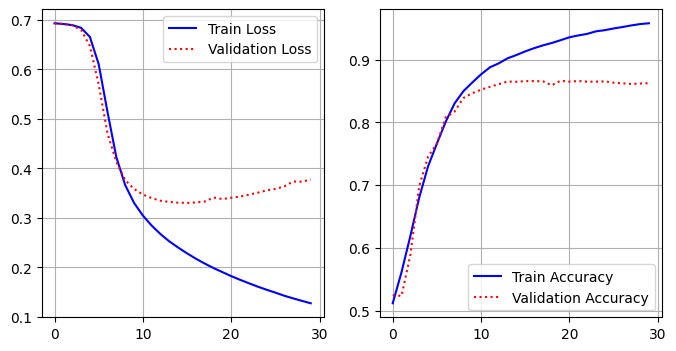

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

In [8]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3964 - acc: 0.8499


[0.3964223861694336, 0.8498799800872803]

## Reuters 데이터

### 데이터 로드 및 전처리

In [16]:
from tensorflow.keras.datasets import reuters

num_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(8982,) (8982,) (2246,) (2246,)


In [17]:
max_len = 500

pad_x_train = pad_sequences(x_train, maxlen = max_len)
pad_x_test = pad_sequences(x_test, maxlen = max_len)

print(pad_x_train, pad_x_test)
print(pad_x_train.shape, pad_x_test.shape)

[[  0   0   0 ...  15  17  12]
 [  0   0   0 ... 505  17  12]
 [  0   0   0 ...  11  17  12]
 ...
 [  0   0   0 ... 407  17  12]
 [  0   0   0 ... 364  17  12]
 [  0   0   0 ... 113  17  12]] [[   0    0    0 ...  510   17   12]
 [6337  268  609 ...  760   17   12]
 [   0    0    0 ...    8   17   12]
 ...
 [   0    0    0 ...   11   17   12]
 [   0    0    0 ...    8   17   12]
 [   0    0    0 ... 1523   17   12]]
(8982, 500) (2246, 500)


### 모델 구성

In [18]:
model = Sequential([Embedding(input_dim=num_words, output_dim=64, input_length=max_len),
                    Conv1D(filters=64, kernel_size=7, activation='relu'),
                    MaxPooling1D(7),
                    Conv1D(filters=64, kernel_size=5, activation='relu'),
                    MaxPooling1D(5),
                    GlobalMaxPooling1D(),             # Flatten 효과
                    Dense(46, activation='softmax')])  # 다중분류

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 64)           640000    
                                                                 
 conv1d_4 (Conv1D)           (None, 494, 64)           28736     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 70, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 66, 64)            20544     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 13, 64)            0         
 g1D)                                                            
                                                                 
 global_max_pooling1d_2 (Gl  (None, 64)               

### 모델 학습

In [19]:
history = model.fit(pad_x_train, y_train,
                    batch_size = 64, epochs = 30,
                    validation_split = 0.2)

Epoch 1/30
113/113 [==============================] - 24s 198ms/step - loss: 2.4183 - acc: 0.4145 - val_loss: 1.8723 - val_acc: 0.5203
Epoch 2/30
113/113 [==============================] - 18s 162ms/step - loss: 1.7032 - acc: 0.5663 - val_loss: 1.5811 - val_acc: 0.6082
Epoch 3/30
113/113 [==============================] - 14s 121ms/step - loss: 1.4273 - acc: 0.6427 - val_loss: 1.4336 - val_acc: 0.6594
Epoch 4/30
113/113 [==============================] - 10s 86ms/step - loss: 1.1504 - acc: 0.7179 - val_loss: 1.2948 - val_acc: 0.6995
Epoch 5/30
113/113 [==============================] - 10s 89ms/step - loss: 0.9125 - acc: 0.7674 - val_loss: 1.2543 - val_acc: 0.7129
Epoch 6/30
113/113 [==============================] - 9s 76ms/step - loss: 0.7195 - acc: 0.8134 - val_loss: 1.2674 - val_acc: 0.7295
Epoch 7/30
113/113 [==============================] - 8s 74ms/step - loss: 0.5533 - acc: 0.8596 - val_loss: 1.3166 - val_acc: 0.7323
Epoch 8/30
113/113 [==============================] - 5s 40ms

### 시각화

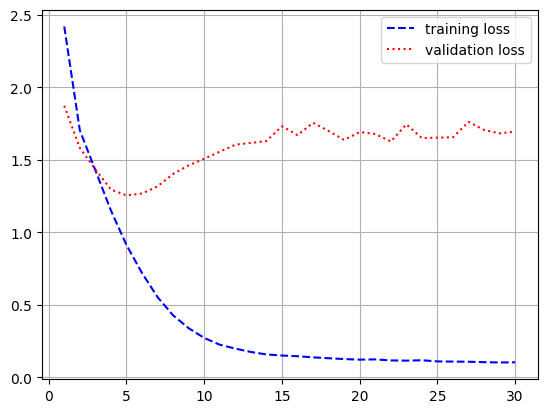

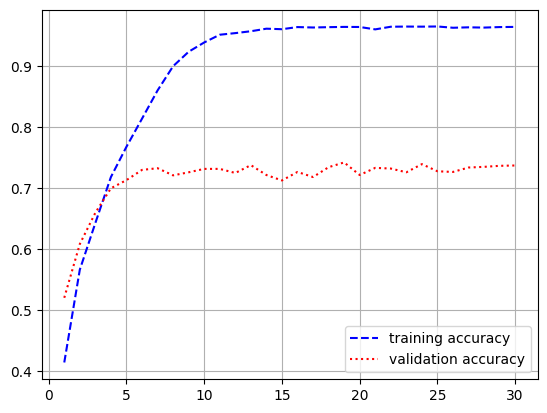

In [22]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r:', label = 'validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'training accuracy')
plt.plot(epochs, val_acc, 'r:', label = 'validation accuracy')
plt.grid()
plt.legend()

plt.show()

In [23]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 1s 5ms/step - loss: 1.7220 - acc: 0.7271


[1.7219762802124023, 0.7270703315734863]

## CNN 스팸 메일 분류

### 데이터 로드 및 전처리

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [29]:
import urllib.request

urllib.request.urlretrieve('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv', filename='spam.csv')
data = pd.read_csv('spam.csv', encoding='latin-1')
print(len(data))

5572


In [30]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [32]:
data['v1'] = data['v1'].replace(['ham', 'spam'], [0, 1])
data = data.iloc[:,:2]
data.drop_duplicates(subset=['v2'], inplace=True) #중복제거
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


<Axes: >

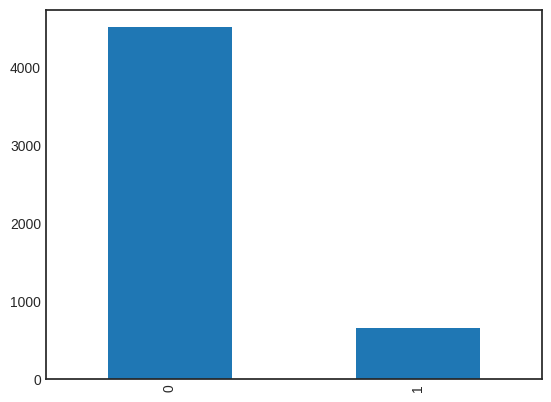

In [33]:
data['v1'].value_counts().plot(kind='bar')

In [34]:
X_data = data['v2']
y_data = data['v1']

In [37]:
# 토큰화
vocab_size = 1000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_data) # 토큰화
sequences = tokenizer.texts_to_sequences(X_data) # 토큰에 인덱스 추가

X_data = sequences

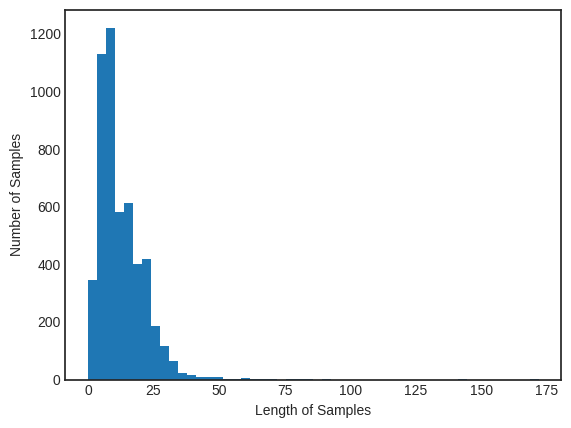

In [38]:
plt.hist([len(s) for s in X_data], bins = 50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [39]:
# 60 이상 단어 제거 패딩
max_len = 60
data = pad_sequences(X_data, maxlen = max_len)
print(data.shape)

(5169, 60)


In [40]:
#train, test 나누기

n_train = int(len(sequences) * 0.8)
n_test = int(len(sequences) - n_train)

X_train = data[:n_train]
y_train = np.array(y_data[:n_train])
X_test = data[n_train:]
y_test = np.array(y_data[n_train:])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4135, 60)
(4135,)
(1034, 60)
(1034,)


### 모델 구성

In [41]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding,Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [42]:
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(Dropout(0.2))
model.add(Conv1D(32, 5, strides=1, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          32000     
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 conv1d_6 (Conv1D)           (None, None, 32)          5152      
                                                                 
 global_max_pooling1d_3 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [43]:
# earlystopping, checkpoints
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode = 'max', verbose=1, save_best_only=True)

### 모델 학습

In [44]:
history = model.fit(X_train, y_train, epochs = 10, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 0.4980 - acc: 0.8552
Epoch 1: val_acc improved from -inf to 0.87304, saving model to best_model.h5
52/52 [==============================] - 11s 145ms/step - loss: 0.4980 - acc: 0.8552 - val_loss: 0.3803 - val_acc: 0.8730
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - ETA: 0s - loss: 0.3640 - acc: 0.8697
Epoch 2: val_acc did not improve from 0.87304
52/52 [==============================] - 5s 89ms/step - loss: 0.3640 - acc: 0.8697 - val_loss: 0.2856 - val_acc: 0.8730
Epoch 3/10
52/52 [==============================] - ETA: 0s - loss: 0.1529 - acc: 0.9435
Epoch 3: val_acc improved from 0.87304 to 0.97944, saving model to best_model.h5
52/52 [==============================] - 1s 26ms/step - loss: 0.1529 - acc: 0.9435 - val_loss: 0.0815 - val_acc: 0.9794
Epoch 4/10
50/52 [===========================>..] - ETA: 0s - loss: 0.0639 - acc: 0.9834
Epoch 4: val_acc improved from 0.97944 to 0.98428, saving model to best_model.h5
52/52 [==============================] - 2s 35ms/step - loss: 0.0647 - acc: 0.9831 - val_loss: 0.0612 - val_acc: 0.9843
Epoch 5/10
52/52 [==============================] - ETA: 0s - loss: 0.0473 - acc: 0.9879
Epoch 5: val_acc did not improve from 0.98428
52/52 [==============================] - 

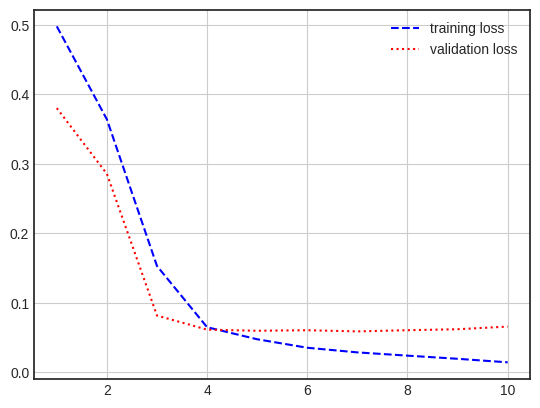

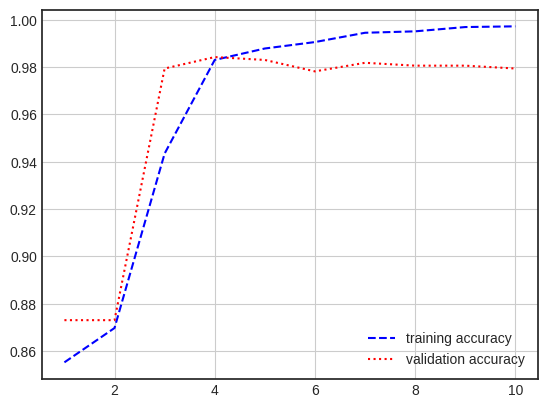

In [45]:
# 시각화

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

plt.show()

In [46]:
model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 5ms/step - loss: 0.0755 - acc: 0.9778


[0.07553543895483017, 0.9777562618255615]